# Modelling menggunakan Logistic Regression

In [18]:
# Import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
# Load data

data_mentah = pd.read_csv('D:\Loan-Prediction-Based-on-Customer-Behavior\Dataset\data_mentah.csv')
data_group = pd.read_csv('D:\Loan-Prediction-Based-on-Customer-Behavior\Dataset\data_group.csv')

data_group.head()

,Married/Single,Profession_Group,Age_Group,Income_Group,Experience_Group,CURRENT_JOB_Group,State_Zone,City_State,Risk_Flag
0,1.0,6.0,2.0,0.0,0.0,1.0,3.0,7.0,0
1,1.0,6.0,1.0,0.0,1.0,2.0,3.0,7.0,0
2,0.0,6.0,0.0,0.0,0.0,1.0,2.0,6.0,0
3,1.0,6.0,1.0,0.0,0.0,0.0,0.0,4.0,1
4,1.0,5.0,1.0,0.0,1.0,1.0,2.0,6.0,1


In [3]:
data_mentah.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,Risk_Flag
0,0.129487,0.034483,0.15,0.214286,0.75,1.0,2.0,0.0,33.0,251.0,13.0,0
1,0.757206,0.327586,0.50,0.642857,0.75,1.0,2.0,0.0,43.0,227.0,14.0,0
2,0.398564,0.775862,0.20,0.285714,0.00,0.0,2.0,0.0,47.0,8.0,12.0,0
3,0.625263,0.344828,0.10,0.142857,0.50,1.0,2.0,1.0,43.0,54.0,17.0,1
4,0.576454,0.448276,0.55,0.214286,1.00,1.0,2.0,0.0,11.0,296.0,22.0,1


## Data Preparation

In [4]:
# Split variabel dependen & independen
x1_lr = data_group.drop('Risk_Flag', axis=1).values
y1_lr = data_group['Risk_Flag']
y1_lr = y1_lr.astype(int)

x2_lr = data_mentah.drop('Risk_Flag', axis=1).values
y2_lr = data_mentah['Risk_Flag']
y2_lr = y2_lr.astype(int)

print(x1_lr.shape)
print(y1_lr.shape)
print(x2_lr.shape)
print(y2_lr.shape)

(442008, 8)
(442008,)
(252000, 11)
(252000,)


## Data Modelling

### Data Group

In [5]:
# Split train & test
## data group
x1_train, x1_test, y1_train, y1_test = train_test_split(x1_lr, y1_lr, test_size=0.2, random_state=42)

In [6]:
# Fit model
lr1 = LogisticRegression().fit(x1_train, y1_train) # model untuk data group
lr1

LogisticRegression()

In [7]:
# Predict x test
predict_lr1 = lr1.predict(x1_test)

In [8]:
# Confusion Matrix
pd.DataFrame(confusion_matrix(y1_test, predict_lr1),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,23114,21209
Actual Yes,20729,23350


In [9]:
# Classification report
print(classification_report(y1_test, predict_lr1))

              precision    recall  f1-score   support

           0       0.53      0.52      0.52     44323
           1       0.52      0.53      0.53     44079

    accuracy                           0.53     88402
   macro avg       0.53      0.53      0.53     88402
weighted avg       0.53      0.53      0.53     88402



**Precision:** Untuk kelas positif (1) hasil presisinya 0.52 yang berarti model memprediksi hasil positif dan hasilnya benar 52%

**Recall:** Recall sebesar 0,53 berarti model mengidentifikasi dengan benar 53% dari semua kasus positif yang sebenarnya.

**F1-score:** F1-score untuk kedua kelas (0 dan 1) adalah 0.53, yang mengindikasikan keseimbangan antara presisi dan recall.


In [10]:
# Logistic regression score
print('x1, y1 train logistic regression score:',lr1.score(x1_train,y1_train))
print('x1, y1 test logistic regression score:',lr1.score(x1_test,y1_test))

x1, y1 train logistic regression score: 0.525406808707997
x1, y1 test logistic regression score: 0.5255989683491323


In [11]:
# Model evaluation data group
lr1_scores = cross_val_score(lr1, x1_lr, y1_lr, cv=5)
print("Logistic Regression Cross-Validation Scores:", lr1_scores)

Logistic Regression Cross-Validation Scores: [0.52730707 0.52622113 0.52614194 0.531951   0.52115926]


Nilai cross-validation untuk model ini berkisar antara 0,521 sampai 0,531 yang menunjukkan bahwa model tidak berkinerja baik dengan data dengan akurasi rata-rata sekitar 52,6%. Variabilitas nilai di seluruh folds menunjukkan bahwa model tidak berkinerja dengan baik dan kemungkinan besar underfit. Underfit terjadi karena model terlalu sederhana untuk menangkap pola dari data yang mengakibatkan kinerja yang buruk, maka dari itu diperlukan untuk menggunakan model lain yang lebih kompleks untuk mengatasi masalah underfit.

In [12]:
# Hyperparameter tuning data group
lr = LogisticRegression(solver='liblinear', penalty='l1')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
lr_Grid = GridSearchCV(lr, param_grid, cv=10, scoring='accuracy')

# Fitting model
lr_Grid.fit(x1_train, y1_train)

print(f'Best Parameters - : {lr_Grid.best_params_}')
print(f'Train Accuracy - : {lr_Grid.score(x1_train, y1_train):.3f}')
print(f'Test Accuracy - : {lr_Grid.score(x1_test, y1_test):.3f}')

Best Parameters - : {'C': 0.001}
Train Accuracy - : 0.527
Test Accuracy - : 0.528


Ditemukan parameter terbaik, yaitu 'C' dengan nilai 0.001, yang kemudian digunakan dalam pembentukan model. Akurasi saat melatih model menunjukkan angka sekitar 52.7%, mengindikasikan bahwa model berhasil memprediksi sebagian besar data train. Meski demikian, angka akurasi ini tidak terbilang tinggi. Begitu juga dengan akurasi pada data test, yang sekitar 52.8%. Akurasi pada kedua set data yang bernilai rendah dapat menandakan bahwa model ini mungkin mengalami kendala dalam melakukan prediksi dengan baik..

In [20]:
# Assuming x1_train and y1_train are your training data
model = LogisticRegression()
model.fit(x1_train, y1_train)

# Extract feature importance values
if hasattr(model, 'coef_'):
    if len(model.coef_) == 1:
        feature_importance = np.abs(model.coef_[0])
    else:
        feature_importance = np.abs(np.mean(model.coef_, axis=0))
elif hasattr(model, 'feature_importances_'):
    feature_importance = model.feature_importances_
else:
    raise AttributeError("Feature importance not available for the given model.")

x1_train_df = pd.DataFrame(x1_train, columns=['Married/Single', 'Profession_Group', 'Age_Group', 'Income_Group', 'Experience Group', 'CUREENT_JOB_Group', 'State_Zone', 'City_State'])

# Create a dictionary with feature names and their importance values
feature_importance_dict = dict(zip(x1_train_df.columns, feature_importance))

# Print feature importance
print("Feature importance:")
for feature, importance in feature_importance_dict.items():
    print(f"Feature: {feature}, Importance: {importance}")

x1_train_df.info()

Feature importance:
Feature: Married/Single, Importance: 0.2635648247636296
Feature: Profession_Group, Importance: 0.004592273961383481
Feature: Age_Group, Importance: 0.07118712067640448
Feature: Income_Group, Importance: 0.07058017870039529
Feature: Experience Group, Importance: 0.06733711021124363
Feature: CUREENT_JOB_Group, Importance: 0.08161860464884309
Feature: State_Zone, Importance: 0.026107693956001293
Feature: City_State, Importance: 0.009382515371557053
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353606 entries, 0 to 353605
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Married/Single     353606 non-null  float64
 1   Profession_Group   353606 non-null  float64
 2   Age_Group          353606 non-null  float64
 3   Income_Group       353606 non-null  float64
 4   Experience Group   353606 non-null  float64
 5   CUREENT_JOB_Group  353606 non-null  float64
 6   State_Zone         3536

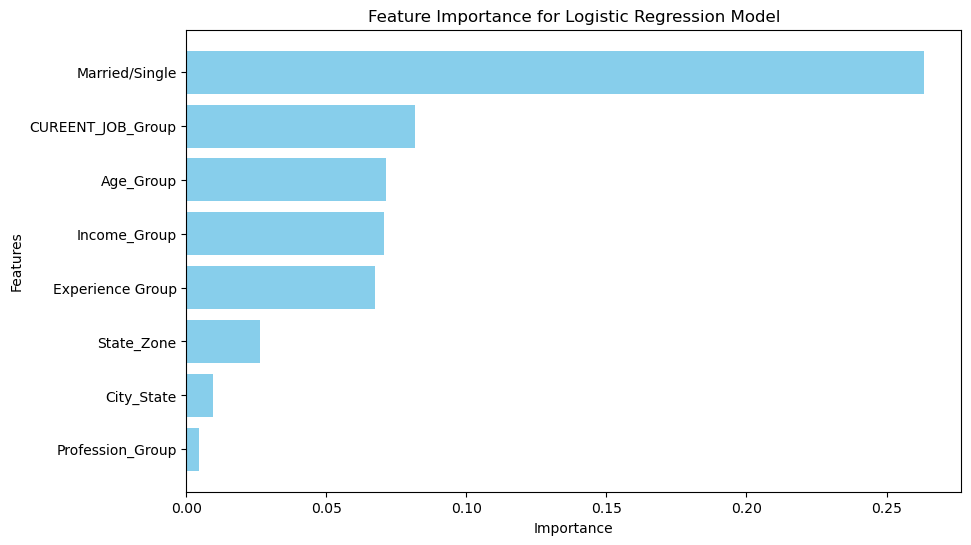

In [21]:
# Sort the feature importance dictionary by values in descending order
sorted_feature_importance = {k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: abs(item[1]))}

# Extract feature names and importance values
features = list(sorted_feature_importance.keys())
importance = list(sorted_feature_importance.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Logistic Regression Model')
plt.show()

Interpretasi:

- Feature marriage status memiliki pengaruh tinggi dalam approval loan karena nasabah dengan status menikah akan lebih bertanggungjawab atas pinjamannya
- Feature lain tidak begitu berpengaruh karena perbedaannya terlalu signifikan terhadap marriage status

### Data Mentah

In [22]:
# Split train & test
## data mentah
x2_train, x2_test, y2_train, y2_test = train_test_split(x2_lr, y2_lr, test_size=0.2, random_state=42)

In [23]:
# Fit model
lr2 = LogisticRegression(max_iter=1000).fit(x2_train, y2_train) # model untuk data mentah
lr2

LogisticRegression(max_iter=1000)

In [24]:
# Predict x test
predict_lr2 = lr2.predict(x2_test)

In [25]:
# Confusion Matrix
pd.DataFrame(confusion_matrix(y2_test, predict_lr2),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,44147,0
Actual Yes,6253,0


In [26]:
# Classification report
print(classification_report(y2_test, predict_lr2, zero_division=0))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44147
           1       0.00      0.00      0.00      6253

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400



**Precision:** Presisi untuk kelas 0 (kelas negatif) adalah 0,88, yang berarti bahwa ketika model memprediksi sebuah contoh sebagai kelas 0, model tersebut benar 88%. Presisi untuk kelas 1 (kelas positif) adalah 0.00, yang menunjukkan bahwa model tidak memprediksi dengan benar setiap instance sebagai kelas 1

**Recall:** Recall untuk kelas 0 adalah 1.00, menunjukkan bahwa model mengidentifikasi dengan benar semua contoh kelas 0. Recall untuk kelas 1 adalah 0.00, menunjukkan bahwa model tidak mengidentifikasi contoh kelas 1 dengan benar

**F1-score:** F1-score untuk kelas 0 adalah 0.93, yang merupakan rata-rata harmonis dari presisi dan recall untuk kelas 0. F1-score untuk kelas 1 adalah 0.00, menunjukkan bahwa kinerja model untuk kelas 1 sangat buruk

Kinerja model untuk kelas 0 relatif baik, dengan presisi, recall, dan F1-score yang tinggi. Namun, performa model untuk kelas 1 sangat buruk, dengan semua metrik menunjukkan bahwa model gagal memprediksi dengan benar setiap contoh dari kelas 1. Hal ini menunjukkan bahwa model data mentah sangat bias terhadap kelas mayoritas dan gagal mengidentifikasi contoh dari kelas minoritas secara efektif.

In [27]:
# Logistic regression score
print('x2, y2 train logistic regression score:',lr2.score(x2_train,y2_train))
print('x2, y2 test logistic regression score:',lr2.score(x2_test,y2_test))

x2, y2 train logistic regression score: 0.8772668650793651
x2, y2 test logistic regression score: 0.8759325396825397


In [28]:
# Model evaluation data mentah
lr2_scores = cross_val_score(lr2, x2_lr, y2_lr, cv=5)
print("Logistic Regression Cross-Validation Scores:", lr2_scores)

Logistic Regression Cross-Validation Scores: [0.87700397 0.87700397 0.87700397 0.87700397 0.87698413]


Dengan menggunakan cross-validation sebanyak 5 folds dengan kesamaan nilai sekitar 87.7% menunjukkan bahwa model ini stabil, atau bisa dikatakan model ini sudah best-fit.

In [30]:
# Hyperparameter tuning data mentah
lr = LogisticRegression(solver='liblinear', penalty='l1')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
lr_Grid = GridSearchCV(lr, param_grid, cv=10, scoring='accuracy')

# Fitting model
lr_Grid.fit(x2_train, y2_train)

print(f'Best Parameters - : {lr_Grid.best_params_}')
print(f'Train Accuracy - : {lr_Grid.score(x2_train, y2_train):.3f}')
print(f'Test Accuracy - : {lr_Grid.score(x2_test, y2_test):.3f}')

Best Parameters - : {'C': 0.001}
Train Accuracy - : 0.877
Test Accuracy - : 0.876


Hasil penelitian menunjukkan bahwa parameter optimal yang ditemukan adalah 'C' dengan nilai 0.001. Nilai ini berkontribusi pada performa terbaik model dalam konteks algoritma yang digunakan. Kinerja model saat pelatihan mencapai akurasi sekitar 87.7%, menandakan kemampuan model dalam memprediksi dengan benar sebagian besar data train yang digunakan. Sementara itu, akurasi pada data test mencapai sekitar 87.6%, mengindikasikan kemampuan model dalam melakukan prediksi yang baik bahkan pada data yang belum pernah dilihat sebelumnya.

In [37]:
model = LogisticRegression()
model.fit(x2_train, y2_train)

# Extract feature importance values
if hasattr(model, 'coef_'):
    if len(model.coef_) == 1:
        feature_importance = np.abs(model.coef_[0])
    else:
        feature_importance = np.abs(np.mean(model.coef_, axis=0))
elif hasattr(model, 'feature_importances_'):
    feature_importance = model.feature_importances_
else:
    raise AttributeError("Feature importance not available for the given model.")

x2_train_df = pd.DataFrame(x2_train, columns=['Income', 'Age', 'Experience', 
                                              'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Married/Single',
                                              'House_Ownership', 'Car_Ownership', 'Profession',
                                              'CITY', 'STATE'])

# Create a dictionary with feature names and their importance values
feature_importance_dict = dict(zip(x2_train_df.columns, feature_importance))

print("Feature importance:")
for feature, importance in feature_importance_dict.items():
    print(f"Feature: {feature}, Importance: {importance}")

x2_train_df.info()

Feature importance:
Feature: Income, Importance: 0.028490391814716767
Feature: Age, Importance: 0.17825542309494505
Feature: Experience, Importance: 0.4791206677033853
Feature: CURRENT_JOB_YRS, Importance: 0.18152484494198995
Feature: CURRENT_HOUSE_YRS, Importance: 0.043619949042191145
Feature: Married/Single, Importance: 0.24201644122274873
Feature: House_Ownership, Importance: 0.17960692955342022
Feature: Car_Ownership, Importance: 0.15954042650359807
Feature: Profession, Importance: 0.001177443231031063
Feature: CITY, Importance: 0.0001296127403484692
Feature: STATE, Importance: 0.001294461637832227
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201600 entries, 0 to 201599
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Income             201600 non-null  float64
 1   Age                201600 non-null  float64
 2   Experience         201600 non-null  float64
 3   CURRENT_JOB_YRS    201600 non

c:\Users\Alyani\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


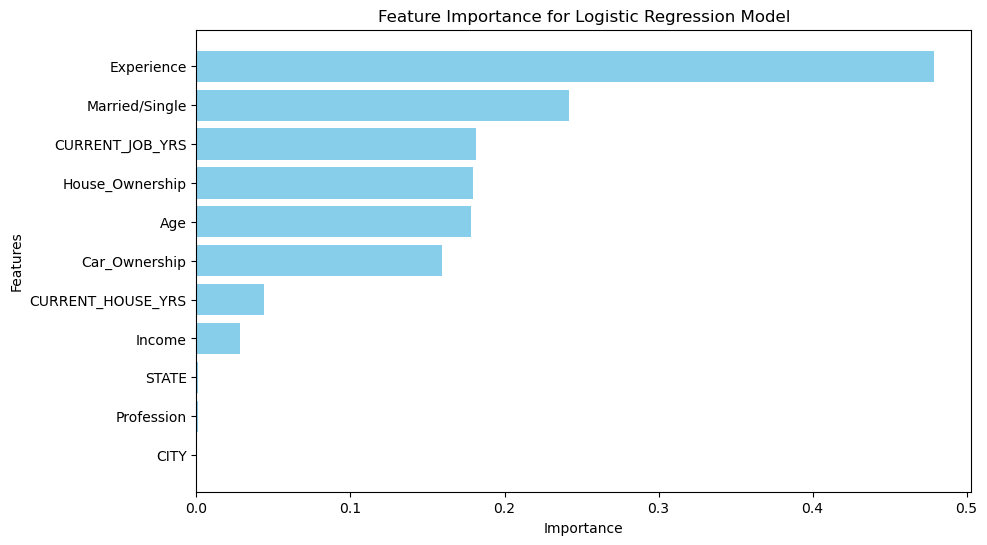

In [38]:
# Sort the feature importance dictionary by values in descending order
sorted_feature_importance = {k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: abs(item[1]))}

# Extract feature names and importance values
features = list(sorted_feature_importance.keys())
importance = list(sorted_feature_importance.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Logistic Regression Model')
plt.show()

Interpretasi: 

- Feature ‘Experience’ merupakan feature dengan nilai importance tertinggi, semakin tinggi jabatan seseorang bekerja semakin besar approval loannya karena dianggap memiliki pendapatan yang stabil.
- Feature ‘Married/Single’ merupakan feature dengan nilai importance tertinggi kedua, nasabah dengan status married akan lebih dianggap bertanggungjawab dengan pinjamannya.
- Feature ‘CURRENT_JOB_YRS’, ‘House_Ownership’, dan ‘Age’ merupakan feature dengan nilai importance tertinggi ketiga dengan nilai yang sama. Lama bekerja, kepemilikan rumah, dan umur juga menjadi pertimbangan dalam loan approval.
- Feature ‘CURRENT_HOUSE_YRS’ menjadi feature dengan nilai importance tertinggi keempat karena mempertimbangkan apakah orang tersebut berpindah-pindah tempat tinggal atau tidak.
- Feature ‘Income’ menjadi feature dengan importance tertinggi kelima karena menunjukkan kemampuan seseorang dalam membayar pinjaman sesuai pendapatannya. Tetapi nilai yang didapatkan dalam menggunakan model ini sangat rendah sehingga kurang bisa dikatakan berpengaruh.
